In [26]:
# Read Fashion MNIST dataset

import util_mnist_reader
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

# Your code goes here . . .

In [27]:
#part 1 - Training using Neural Network with One Hidden Layer

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




In [28]:
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('Y_train shape : ', Y_train.shape)
print('Y_test shape : ', Y_test.shape)

X_train shape :  (60000, 784)
X_test shape :  (10000, 784)
Y_train shape :  (60000,)
Y_test shape :  (10000,)


In [29]:
#normalizing training data
X_train = X_train/255

In [30]:
#normalizing test data
X_test = X_test/255

In [31]:
X_train = X_train.T
X_test = X_test.T
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)

X_train shape :  (784, 60000)
X_test shape :  (784, 10000)


In [32]:
outputLayerNodes = 10

In [33]:
Y_train = Y_train.reshape(1,Y_train.shape[0])
Y_test = Y_test.reshape(1,Y_test.shape[0])
print('Y_train shape : ', Y_train.shape)
print('Y_test shape : ', Y_test.shape)

Y_train shape :  (1, 60000)
Y_test shape :  (1, 10000)


In [34]:
Y_train_new = np.eye(outputLayerNodes)[Y_train.astype('int32')]
Y_test_new = np.eye(outputLayerNodes)[Y_test.astype('int32')]
print('Y_train_new shape : ', Y_train_new.shape)
print('Y_test_new shape : ', Y_test_new.shape)

Y_train_new shape :  (1, 60000, 10)
Y_test_new shape :  (1, 10000, 10)


In [35]:
Y_train_new = Y_train_new.T.reshape(outputLayerNodes, Y_train.shape[1])
Y_test_new = Y_test_new.T.reshape(outputLayerNodes, Y_test.shape[1])
print('Y_train_new shape : ', Y_train_new.shape)
print('Y_test_new shape : ', Y_test_new.shape)

Y_train_new shape :  (10, 60000)
Y_test_new shape :  (10, 10000)


In [36]:
Y_train = Y_train_new
Y_test = Y_test_new

In [37]:
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('Y_train shape : ', Y_train.shape)
print('Y_test shape : ', Y_test.shape)

X_train shape :  (784, 60000)
X_test shape :  (784, 10000)
Y_train shape :  (10, 60000)
Y_test shape :  (10, 10000)


In [38]:
shuffle_index = np.random.permutation(X_train.shape[1])
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [39]:
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('Y_train shape : ', Y_train.shape)
print('Y_test shape : ', Y_test.shape)

X_train shape :  (784, 60000)
X_test shape :  (784, 10000)
Y_train shape :  (10, 60000)
Y_test shape :  (10, 10000)


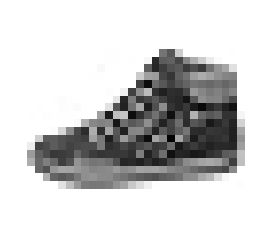

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [40]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(Y_train[:,i])

In [41]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [42]:
def compute_multiclass_loss(Y, Y_cap):
    Loss_sum = np.sum(np.multiply(Y, np.log(Y_cap)))
    m = Y.shape[1]
    Loss = -(1/m) * Loss_sum
    return Loss

In [43]:
input_nodes = X_train.shape[0]
hidden_nodes = 64
learning_rate = 0.5

print('input_nodes : ', input_nodes)

input_nodes :  784


In [44]:
W1 = np.random.randn(hidden_nodes, input_nodes)
b1 = np.zeros((hidden_nodes, 1))
W2 = np.random.randn(outputLayerNodes, hidden_nodes)
b2 = np.zeros((outputLayerNodes, 1))

In [45]:
print('W1 shape : ', W1.shape)
print('b1 shape : ', b1.shape)
print('W2 shape : ', W2.shape)
print('b2 shape : ', b2.shape)

W1 shape :  (64, 784)
b1 shape :  (64, 1)
W2 shape :  (10, 64)
b2 shape :  (10, 1)


In [46]:
losstrack = []
epoch = 1000
m = X_train.shape[1]
print('m : ',m)

m :  60000


In [47]:
for i in range(epoch):

    Z1 = np.matmul(W1, X_train) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis = 0)

    cost = compute_multiclass_loss(Y_train, A2)
    losstrack.append(np.squeeze(cost))

    dZ2 = A2 - Y_train
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X_train.T)
    db1 = (1./m) * np.sum(dZ1, axis = 1, keepdims = True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print('Epoch : ', i, 'cost : ', cost)

print('Final cost : ', cost)

Epoch :  0 cost :  8.049371263567052
Epoch :  100 cost :  0.9342606814638517
Epoch :  200 cost :  0.7912896525158679
Epoch :  300 cost :  0.7289832595932996
Epoch :  400 cost :  0.6900511732006089
Epoch :  500 cost :  0.6619154970994269
Epoch :  600 cost :  0.6403056471853519
Epoch :  700 cost :  0.6228734587935322
Epoch :  800 cost :  0.608273232005863
Epoch :  900 cost :  0.5957325064573233
Final cost :  0.5848607414342417


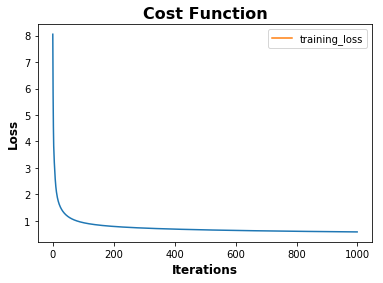

In [48]:
plt.plot(losstrack)
plt.plot(cost, label = "training_loss")
plt.xlabel('Iterations', fontweight = "bold", fontsize = 12)
plt.ylabel('Loss', fontweight = "bold", fontsize = 12)
plt.title("Cost Function", fontweight = "bold", fontsize = 16)
plt.legend()
plt.show()

In [49]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis = 0)

In [50]:
predictions = np.argmax(A2, axis = 0)
labels = np.argmax(Y_test, axis = 0)

In [51]:
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[772   6  25  42   6   2 187   0   8   0]
 [  6 921   1  23   3   0   6   0   0   0]
 [ 20  15 663  12 150   1 164   0  24   0]
 [ 73  41  10 805  33   2  45   0  13   1]
 [  6   6 176  38 686   0 147   0   7   1]
 [  5   0   0   2   1 852   3  61  20  25]
 [ 99   9 112  68 113   1 417   0  15   0]
 [  0   0   0   0   0  84   0 854  12  50]
 [ 19   2  13  10   8  22  31   4 899   0]
 [  0   0   0   0   0  36   0  81   2 923]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1048
           1       0.92      0.96      0.94       960
           2       0.66      0.63      0.65      1049
           3       0.81      0.79      0.80      1023
           4       0.69      0.64      0.66      1067
           5       0.85      0.88      0.87       969
           6       0.42      0.50      0.45       834
           7       0.85      0.85      0.85      1000
           8       0.90      0.89      0.90      1008
           9       0.92     

In [52]:
#part 2 - Training using Multi-Layer Neural Network

import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras import backend
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score




C:\Users\rasita\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [53]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [54]:
x_train = x_train / 255.0 
x_test = x_test / 255.0

In [55]:
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (60000, 28, 28)
x_test shape :  (10000, 28, 28)
y_train shape :  (60000,)
y_test shape :  (10000,)


In [56]:
model = tf.keras.models.Sequential([
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(512, activation = tf.nn.tanh),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                            ])

In [57]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [58]:
iterations = model.fit(x_train, y_train, epochs = 30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 15s 245us/sample - loss: 0.5126 - accuracy: 0.8162
Epoch 2/30
60000/60000 [==============================] - 13s 223us/sample - loss: 0.4189 - accuracy: 0.8470
Epoch 3/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.3875 - accuracy: 0.8599
Epoch 4/30
60000/60000 [==============================] - 13s 218us/sample - loss: 0.3640 - accuracy: 0.8654
Epoch 5/30
60000/60000 [==============================] - 14s 234us/sample - loss: 0.3500 - accuracy: 0.8728
Epoch 6/30
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3365 - accuracy: 0.8753
Epoch 7/30
60000/60000 [==============================] - 13s 221us/sample - loss: 0.3336 - accuracy: 0.8780
Epoch 8/30
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3223 - accuracy: 0.8818
Epoch 9/30
60000/60000 [==============================] - 14s 228us/sample - loss: 0.3149 - accuracy: 0.8

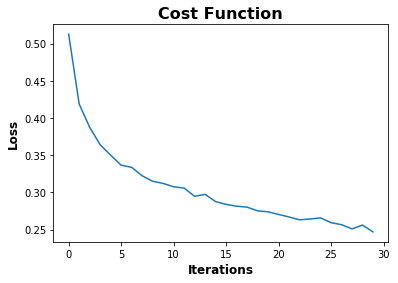

In [65]:
plt.plot(iterations.history['loss'])
plt.xlabel('Iterations', fontweight = "bold", fontsize = 12)
plt.ylabel('Loss', fontweight = "bold", fontsize = 12)
plt.title("Cost Function", fontweight = "bold", fontsize = 16)
plt.show()

In [66]:
test_predictions = model.predict(x_test)

In [67]:
test_predictions = model.predict_classes(x_test)

In [68]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(conf_mat)

[[793   1  31  19   3   1 147   0   5   0]
 [  1 974   3  13   3   0   5   0   1   0]
 [ 12   0 896   9  27   0  56   0   0   0]
 [ 20   6  21 883  38   0  30   0   2   0]
 [  0   1 246  19 665   0  67   0   2   0]
 [  0   0   0   1   0 965   0  23   0  11]
 [ 90   0 122  25  41   0 715   0   7   0]
 [  0   0   0   0   0  18   0 968   0  14]
 [  4   0  20   1   2   3   6   2 962   0]
 [  0   0   0   0   0  14   1  38   0 947]]


In [69]:
print(classification_report(y_true = y_test, y_pred = test_predictions))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.67      0.90      0.77      1000
           3       0.91      0.88      0.90      1000
           4       0.85      0.67      0.75      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.71      0.71      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [70]:
#part 3 - Training using Convolution Neural Network

import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [72]:
(X_train,Y_train), (X_test,Y_test) = fashion_mnist.load_data()

In [73]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)

X_train shape :  (60000, 28, 28, 1)
X_test shape :  (10000, 28, 28, 1)


In [74]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)

X_train shape :  (60000, 28, 28, 1)
X_test shape :  (10000, 28, 28, 1)


In [75]:
X_train = X_train / 255
X_test = X_test / 255

In [76]:
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

In [77]:
model = Sequential()

In [78]:
model.add(Conv2D(64, (3,3), input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [79]:
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [80]:
model.add(Flatten())
model.add(Dense(64))

In [81]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [82]:
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [83]:
iterations1 = model.fit(X_train, Y_train_one_hot, batch_size = 64, epochs = 30)

Epoch 1/30
60000/60000 [==============================] - 96s 2ms/step - loss: 0.4601 - accuracy: 0.8349
Epoch 2/30
60000/60000 [==============================] - 95s 2ms/step - loss: 0.3146 - accuracy: 0.8867
Epoch 3/30
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2745 - accuracy: 0.8992
Epoch 4/30
60000/60000 [==============================] - 101s 2ms/step - loss: 0.2468 - accuracy: 0.9100
Epoch 5/30
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2255 - accuracy: 0.9176
Epoch 6/30
60000/60000 [==============================] - 103s 2ms/step - loss: 0.2092 - accuracy: 0.9233
Epoch 7/30
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1935 - accuracy: 0.9281
Epoch 8/30
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1771 - accuracy: 0.9354
Epoch 9/30
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1657 - accuracy: 0.9388
Epoch 10/30
60000/60000 [=========================

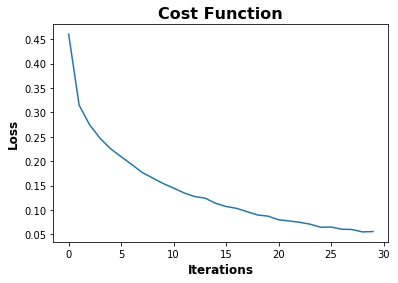

In [86]:
plt.plot(iterations1.history['loss'])
plt.xlabel('Iterations', fontweight = "bold", fontsize = 12)
plt.ylabel('Loss', fontweight = "bold", fontsize = 12)
plt.title("Cost Function", fontweight = "bold", fontsize = 16)
plt.show()

In [87]:
test_loss, test_acc = model.evaluate(X_test, Y_test_one_hot)

10000/10000 [==============================] - 4s 382us/step


In [89]:
print('Test loss : ', test_loss)
print('Test accuracy : ', test_acc)

Test loss :  0.5390912225244566
Test accuracy :  0.9036999940872192


In [90]:
test_predictions = model.predict_classes(X_test)

In [91]:
conf_mat = confusion_matrix(y_true = Y_test, y_pred = test_predictions)
print(conf_mat)
print(classification_report(y_true = Y_test, y_pred = test_predictions))

[[901   0  12  16   5   1  62   0   3   0]
 [  4 982   1   9   3   0   1   0   0   0]
 [ 45   1 831  10  32   0  80   0   1   0]
 [ 34   5   8 885  30   0  37   1   0   0]
 [  4   1  56  26 818   1  94   0   0   0]
 [  0   0   0   0   0 979   1  14   0   6]
 [162   0  37  16  47   0 734   0   4   0]
 [  0   0   0   0   0   7   0 966   0  27]
 [  9   0   2   4   2   2   6   3 971   1]
 [  0   0   0   0   0   6   1  23   0 970]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.83      0.85      1000
           3       0.92      0.89      0.90      1000
           4       0.87      0.82      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.73      0.73      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97     